# Домашнее задание

В этом домашнем задании вы обучите полносвязную нейронную сеть для решения задачи классификации на датасете CIFAR-10. В этом датасете содержатся цветные (трехканальные) изображения размера 32 на 32 пикселя. Изображения относятся к 10 классам.

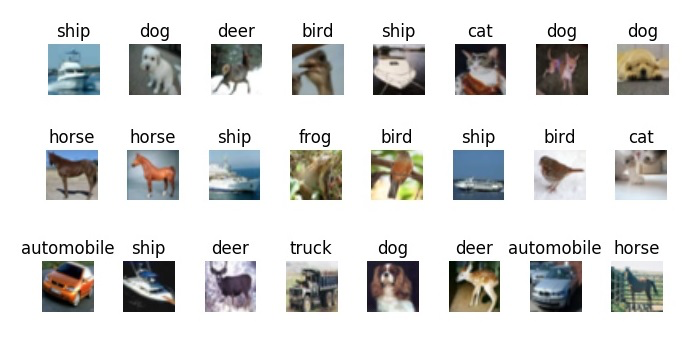

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

## Задание

Задайте гиперпаметры для нейронной сети:

* `input_size` - число входных признаков (равно число пикселей * число каналов). Вычислите `input_size` самостоятельно.

* `hidden_size` - число нейронов на скрытом слое сети. Поставьте 500.

* `num_classes` - число классов. Задайте самостоятельно.

Чему равен `input_size`?


In [2]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Hyper-parameters
input_size = 32 * 32 * 3
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

Загрузим данные и масштабируем их.

In [3]:

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                          train=False,
                                          transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 48.6MB/s]


Extracting ../../data/cifar-10-python.tar.gz to ../../data


In [4]:
len(train_dataset)

50000

## Задание

Сколько объектов в `train_dataset`?

Создадим data-loaders.

In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## Задание

Допишите метод `forward`. Архитектура сети следующая:

1) Полносвязный слой `fc1`

2) Функция активации ReLU

3) Полносвязный слой `fc2`

Сколько нейронов поступает на вход (`in_features`) в слой `fc2`?

In [6]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)

        out = self.relu(out)

        out = self.fc2(out)

        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

Задайте Loss - кросс-энтропию и оптимизатор - Adam с learning_rate, определенным константой из первого задания.

In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Задание

Допишите цикл для обучения модели:

1) На вход в цикле подается объект `images` - батч, состоящий из картинок, вытянутых в вектор. Объект `images` переносится на device (на видеокарту, если есть).

2) Каждую сотую итерацию добавляйте значение функции потерь в список log_loss. Значние функции потерь можно посмотреть в `loss.data` (не забудьте перевести tensor в np.array при помощи метода `.numpy()`, а если делаете вычисления на gpu, то `.cpu().numpy()`)

Чему равен loss на последней итерации после отработки цикла? Ответ округлите до целого числа.

In [8]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

loss_log = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 32 * 32 * 3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            loss_log.append(loss.data.cpu().numpy())

Epoch [1/10], Step [100/500], Loss: 1.7297
Epoch [1/10], Step [200/500], Loss: 1.3931
Epoch [1/10], Step [300/500], Loss: 1.6976
Epoch [1/10], Step [400/500], Loss: 1.5336
Epoch [1/10], Step [500/500], Loss: 1.5230
Epoch [2/10], Step [100/500], Loss: 1.7433
Epoch [2/10], Step [200/500], Loss: 1.4761
Epoch [2/10], Step [300/500], Loss: 1.6296
Epoch [2/10], Step [400/500], Loss: 1.2988
Epoch [2/10], Step [500/500], Loss: 1.5107
Epoch [3/10], Step [100/500], Loss: 1.2457
Epoch [3/10], Step [200/500], Loss: 1.5863
Epoch [3/10], Step [300/500], Loss: 1.1315
Epoch [3/10], Step [400/500], Loss: 1.1966
Epoch [3/10], Step [500/500], Loss: 1.4546
Epoch [4/10], Step [100/500], Loss: 1.1383
Epoch [4/10], Step [200/500], Loss: 1.1687
Epoch [4/10], Step [300/500], Loss: 1.2073
Epoch [4/10], Step [400/500], Loss: 1.2593
Epoch [4/10], Step [500/500], Loss: 1.4430
Epoch [5/10], Step [100/500], Loss: 1.1543
Epoch [5/10], Step [200/500], Loss: 1.1367
Epoch [5/10], Step [300/500], Loss: 0.9634
Epoch [5/10

## Задание  

Нарисуйте график изменения лосса, используя список `loss_log`.

Что можно сказать по этому графику?

Text(0.5, 0, 'num_iter')

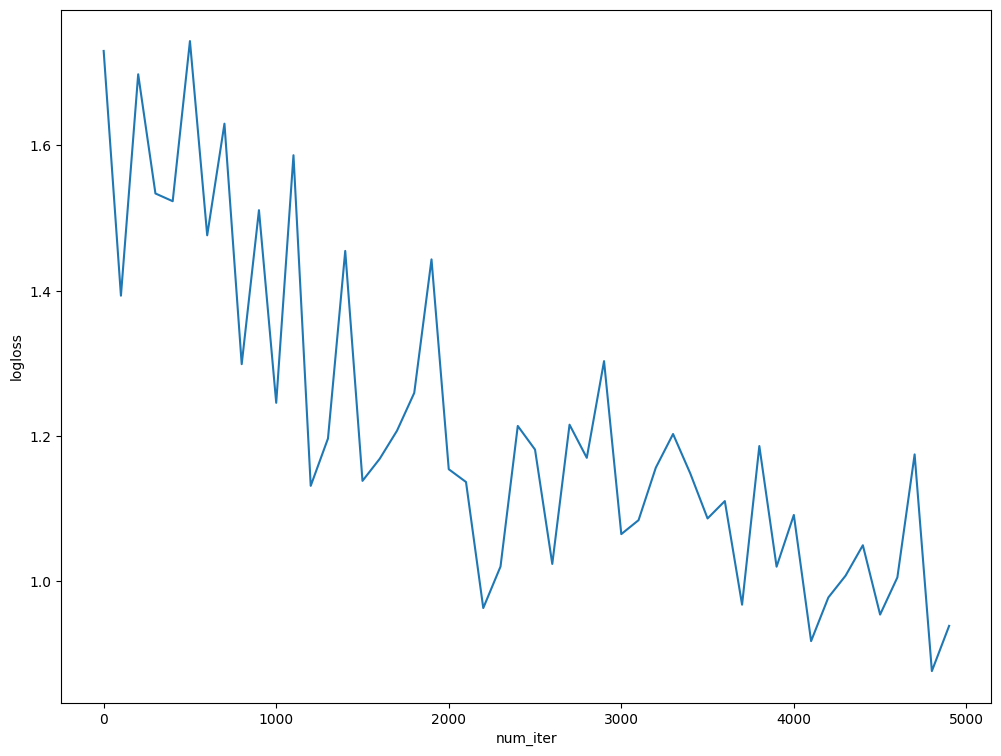

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 9))

num_iter = np.arange(1, len(loss_log) * 100 + 1, 100)

plt.plot(num_iter, loss_log)

plt.ylabel('logloss')

plt.xlabel('num_iter')



## Задание

Допишите цикл тестирования модели:

1) На вход, как и в предыдущем задании, подайте такой же тензор `images` и перенесите его на device

2) Также задайте `labels`

3) Сделайте прогноз модели на мини-батче `images` - результат будет в `outputs`

4) В конце вычислите `accuracy` и выведите ее на экран по формуле $100 \cdot correct / total$

Чему равна `accuracy`? Ответ округлите до целого числа.

In [10]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 32 * 32 * 3).to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # your code for accuracy here
    print(f'accuracy:{100 * correct / total}')

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

accuracy:50.76
